### Пример процессинга ЭЭГ с помощью класса EEGAnalyser
В ходе данного исследования  был проведен эксперимент, направленный на стимуляцию процессов
вспоминания и воображения у испытуемых. 

Эксперимент состоял из трех видов заданий: на память, воображение и
сенсорное восприятие и трех соответствующих им контрольных заданий.
Каждое задание предъявлялось отдельным блоком, состоящим из 40-80 проб.
В общем виде проба состоит из вербального стимула и белого экрана или
слайда с изображением. 
<img src="ExperimentDescription.jpg" style="width:70%">

 ***Общая схема пробы.*** Длительность проб – 6500 мс, престимульный
интервал – 300 мс, длительность первого (вербального) стимула - 400 мс,
длительность второго стимула (изображение) 5000 мс, длительность интервала
между двумя стимулами в паре – 800 мс. Интервал между пробами
рандомизирован – от 700 мс до 1000 мс.

В задании на сенсорное восприятие испытуемому в качестве
вербального стимула предъявлялось некое слово.Затем необходимо было
рассмотреть и запомнить картинку, соответствующую этому вербальному
стимулу, и нажать на кнопку после картинки.  В задание на память или репродуктивное воображение также
предъявлялось слово в качестве вербального стимула, затем при
предъявлении белого экрана испытуемому необходимо было вспомнить и
визуализировать картинку, соответствующую предъявленному вербальному
стимулу, и нажать на кнопку, если визуализация удалась.
Продуктивное или творческое воображение подразумевало задачу
придумать и визуализировать химерное изображение. Здесь вербальный
стимул содержал уже два слова. Далее, на фоне белого экрана испытуемый
должен был вспомнить ранее предъявленные изображения, соответствующие
этим словам, придумать и визуализировать на белом экране некий химерный
объект из двух изображений. А также нажать на кнопку, если удалось
выполнить задание.
В контрольных блоках инструкция к заданию отсутствовала. Таким
образом, испытуемые после вербального стимула рассматривали картинку
или смотрели на белый экран, а после него нажимали кнопку.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
import sys
sys.path.append('/Users/Irisha1/PycharmProjects/EEGAnalyser/')
from EEGProcessing import EEGAnalyser

In [2]:
with open('DATA/EEG_MentalInfo.pickle', 'rb') as f:
    EEG_info = pickle.load(f)
print(EEG_info.keys() )
Im_names = EEG_info['list_Im']
Mem_names = EEG_info['list_Mem']
Sl_names = EEG_info['list_Sl']


dict_keys(['Table', 'list_Mem', 'list_Sl', 'list_Im'])


In [3]:
def path_define(name):
    sig_number = 'D0000'+str(name)
    sigName = 'DATA/CSV/'+ sig_number +'.csv'
    timingName = 'DATA/timing/'+sig_number+'.TXT'
    failedTrialsName = 'DATA/failed_trials/'+sig_number+'.txt'
    return sigName, timingName, failedTrialsName

In [4]:
#инициализируем объект
myExperiment = EEGAnalyser(min_freq = 4, max_freq=30, num_freq=7)
#нужно вообще только один раз, чтобы узнать минимальную длину пробы
timingPath = 'DATA/timing/'
min_trial_len = myExperiment.find_minimal_trial(timingPath)
print(myExperiment.min_length)


3480


In [47]:
name = Mem_names[7]
sigName, timingName, failedTrialsName = path_define(name)
data = myExperiment.load_data(sigName, timingName, failedTrialsName)
data = myExperiment.normalize_data()

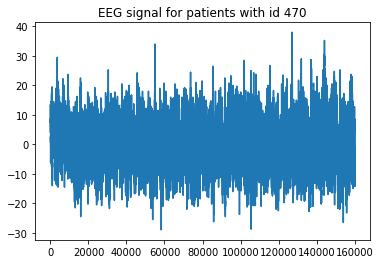

In [48]:
#смотрим какой-нибудь канал
plt.plot(data.iloc[:,1]); plt.title('EEG signal for patients with id {}'.format(name));

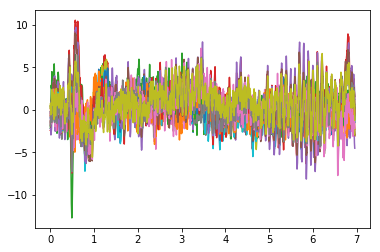

In [49]:
timeExp = np.arange(min_trial_len)*0.002
ERP = myExperiment.computeERP()
_=plt.plot(timeExp, ERP)

In [50]:
freq,wt = myExperiment.wavelet_transform()

Compute channel:  1
Compute channel:  2
Compute channel:  3
Compute channel:  4
Compute channel:  5
Compute channel:  6
Compute channel:  7
Compute channel:  8
Compute channel:  9
Compute channel:  10
Compute channel:  11
Compute channel:  12
Compute channel:  13
Compute channel:  14
Compute channel:  15
Compute channel:  16
Compute channel:  17
Compute channel:  18
Compute channel:  19


In [51]:
#Нормируем относительно престимульного интервала. Получаем кандидата на дальнейшее использование
normwt = myExperiment.baseline_normalization()
normwt.shape

(7, 3480, 19)

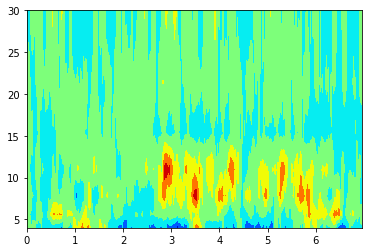

In [55]:
plt.contourf(timeExp, myExperiment.freq, normwt[:,:,8], cmap=plt.cm.jet )

In [56]:
#Если считать это индивидуально для каждой пробы, надо использовать trial_average = False
normwtSingle = myExperiment.baseline_normalization(trial_average = False)
normwtSingle.shape

(7, 3480, 46, 19)

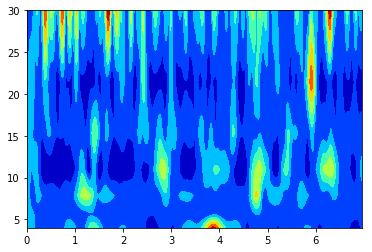

In [57]:
plt.contourf(timeExp, myExperiment.freq, normwtSingle[:,:,5,8], cmap=plt.cm.jet )

In [58]:
ispc = myExperiment.phase_coherence(0,3, num_points = 500)

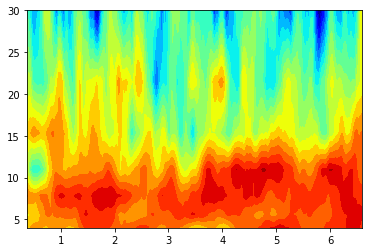

In [59]:
plt.contourf(ispc['times'] *0.002, myExperiment.freq, ispc['ispc'],20,cmap=plt.cm.jet)